In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [19]:
resultados_modelos = pd.read_csv('data/resultados_dos_modelos_aluguel.csv')
resultados_rn = pd.read_csv('data/resultados_da_rn_aluguel.csv').drop(columns=['index']).replace('R2', 'R²')


In [27]:
resultados_rn.loc[resultados_rn["Métrica"] == "MAE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "MAE"]["Valor"] * -1
resultados_rn.loc[resultados_rn["Métrica"] == "RMSE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "RMSE"]["Valor"] * -1
resultados_rn.loc[resultados_rn["Métrica"] == "MAPE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "MAPE"]["Valor"] / 100

In [28]:
print(resultados_rn["Métrica"].unique())
print(resultados_modelos["Métrica"].unique())

['MAE' 'RMSE' 'R²' 'MAPE']
['MAE' 'RMSE' 'R²' 'MAPE']


In [29]:
resultados_totais = pd.concat([resultados_modelos, resultados_rn])
resultados_totais

,Métrica,Valor,Algoritmo
0,MAE,-1777.813181,Ridge
1,MAE,-1777.198873,Ridge
2,MAE,-1771.162057,Ridge
3,MAE,-1728.559083,Ridge
4,MAE,-1707.082274,Ridge
...,...,...,...
967,MAPE,0.573361,RedeNeural
968,MAPE,0.573428,RedeNeural
969,MAPE,0.657522,RedeNeural
970,MAPE,0.690661,RedeNeural


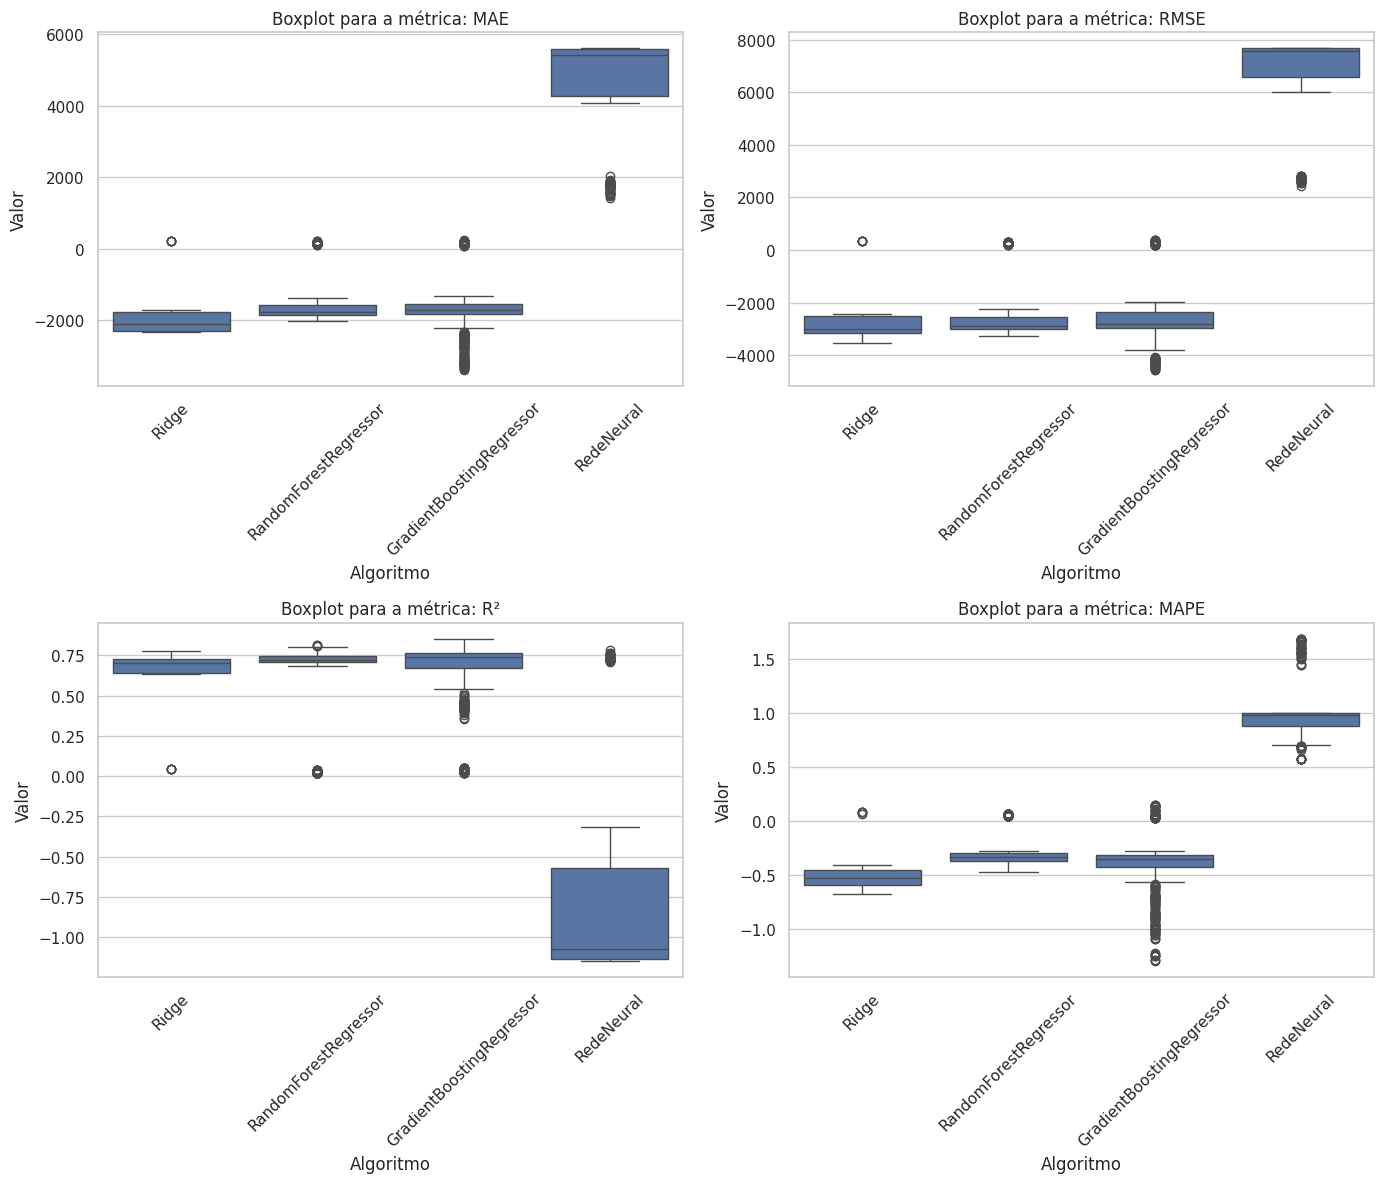

In [30]:
# Ajustar o estilo dos plots
sns.set(style="whitegrid")

# Obter as métricas únicas
metricas = resultados_totais['Métrica'].unique()

# Determinar o número de linhas e colunas
ncols = 2
nrows = math.ceil(len(metricas) / ncols)  # Calcula o número de linhas necessário

# Criar uma grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))
axes = axes.flatten()  # Achatar o array de eixos para facilitar o loop

# Criar um boxplot para cada métrica
for i, metrica in enumerate(metricas):
    sns.boxplot(
        data=resultados_totais[resultados_totais['Métrica'] == metrica],
        x='Algoritmo',
        y='Valor',
        ax=axes[i]
    )
    axes[i].set_title(f"Boxplot para a métrica: {metrica}")
    axes[i].set_ylabel("Valor")
    axes[i].set_xlabel("Algoritmo")
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos extras, caso existam
for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()
